In [3]:
!pip install -r ../requirements.txt



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('dataset.xlsx')

In [5]:
print(df)

                   Subject  Year Mark          Field   MH Repeated  Credits  \
0                 Calculus     1  7.5           Math   No       No        6   
1                  Physics     1  7.7        Physics   No       No        6   
2              Electronics     1  7.8        Physics   No       No        6   
3            Programming 1     1  7.2    Programming   No       No        6   
4            Discrete Math     1  7.7           Math   No       No        6   
5                  Algebra     1    8           Math   No       No        6   
6               Statistics     1  7.5           Math   No       No        6   
7                 Business     1  9.1          Extra   No       No        6   
8                      OOP     1  9.5    Programming   No       No        6   
9      Computer Technology     1   10       Hardware   No       No        6   
10              Algorithms     2   10    Programming  Yes       No        6   
11               Databases     2  8.7    Programming

In [6]:
def choose_year(df, year:int, semester=None):
    if semester == None:
        if year == 1:
            df = df.iloc[:10]
        elif year == 2:
            df = df.iloc[10:20]
        elif year == 3:
            df = df.iloc[20:30]
        else:
            df = df.iloc[30:40]
    else:
        if year == 1 and semester == 1:
            df = df.iloc[:5]
        elif year == 1 and semester == 2:
            df = df.iloc[5:10]
        elif year == 2 and semester == 1:
            df = df.iloc[10:15]
        elif year == 2 and semester == 2:
            df = df.iloc[15:20]
        elif year == 2 and semester == 1:
            df = df.iloc[20:25]
        elif year == 2 and semester == 2:
            df = df.iloc[25:30]
        elif year == 2 and semester == 1:
            df = df.iloc[30:35]
        else:
            df = df.iloc[35:40]
    return df

In [7]:
def marks_by_subject(df, type_graph="bars", year=1, semester=None):
    df_subset = choose_year(df, year, semester)

    x = df_subset["Subject"]
    y = pd.to_numeric(df_subset["Mark"], errors='coerce')
    fields = df_subset["Field"]

    unique_fields = fields.unique()
    colors = sns.color_palette("husl", len(unique_fields))  
    field_color_map = dict(zip(unique_fields, colors))
    bar_colors = fields.map(field_color_map)
    
    fig, ax = plt.subplots()

    if(type_graph == "bars"):
        ax.bar(x, y, color=bar_colors)
        handles = [plt.Rectangle((0,0),1,1, color=field_color_map[field]) for field in unique_fields]
    elif(type_graph == "lines"):
        ax.plot(x, y, marker='o', linestyle='-', color='b', alpha=0.5)  
        for i, (subject, mark, color) in enumerate(zip(x, y, bar_colors)):
            ax.plot(subject, mark, marker='o', color=color, markersize=8)
        handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, linestyle='') for color in colors]

    ax.set_ylim(0, 10)
    ax.set_ylabel("Mark")
    if semester == None:
        ax.set_title('Marks by Subject Year ' + str(year))
    else:
        ax.set_title('Marks by Subject Year ' + str(year) + ' and Semester ' + str(semester))
    plt.xticks(rotation=45, ha='right', rotation_mode='default')

    ax.legend(handles, unique_fields, title="Fielf")

    fig.tight_layout()
    plt.show()

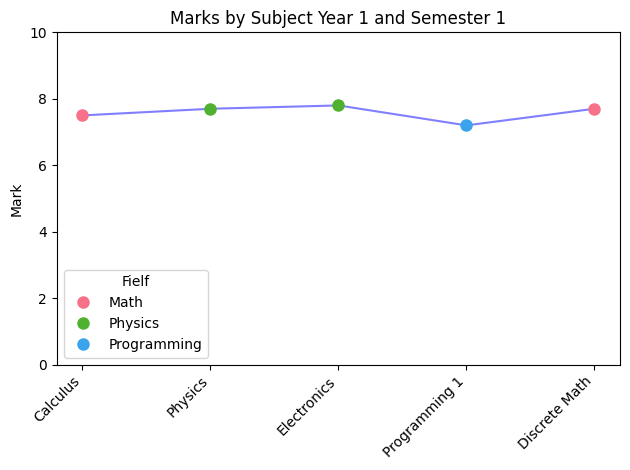

In [8]:
marks_by_subject(df, type_graph="lines", year=1, semester=1)

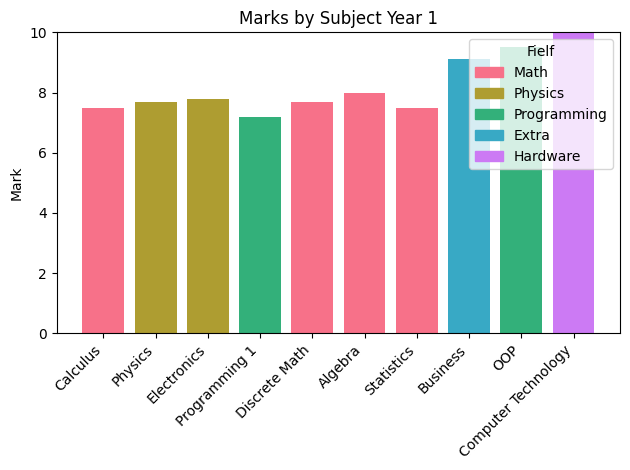

In [9]:
marks_by_subject(df, type_graph="bars", year=1)

In [10]:
def mean_year(df, year:int, semester=None):
    df_subset = choose_year(df, year, semester)
    mean_column = pd.to_numeric(df_subset['Mark'], errors='coerce').mean()
    return mean_column

In [11]:
mean_year1 = mean_year(df, 1)
mean_year2 = mean_year(df, 2)
mean_year3 = mean_year(df, 3)
mean_year4 = mean_year(df, 4)
means = [mean_year1, mean_year2, mean_year3, mean_year4]
mean_expedient = pd.to_numeric(df['Mark'], errors='coerce').mean()

In [12]:
print(means)
print(mean_expedient)

[np.float64(8.2), np.float64(8.790000000000001), np.float64(8.54), np.float64(9.0)]
8.525806451612903


In [13]:
def median_year(df, year:int, semester=None):
    df_subset = choose_year(df, year, semester)
    median_column = pd.to_numeric(df_subset['Mark'], errors='coerce').median()
    return median_column

In [14]:
median_year1 = median_year(df, 1)
median_year2 = median_year(df, 2)
median_year3 = median_year(df, 3)
median_year4 = median_year(df, 4)
medians = [median_year1, median_year2, median_year3, median_year4]
median_expedient = pd.to_numeric(df['Mark'], errors='coerce').median()

In [15]:
print(medians)
print(median_expedient)

[np.float64(7.75), np.float64(8.899999999999999), np.float64(8.35), np.float64(9.0)]
8.3


In [16]:
def mode_year(df, year:int, semester=None):
    df_subset = choose_year(df, year, semester)
    mode_column = pd.to_numeric(df_subset['Mark'], errors='coerce').mode()
    return mode_column

In [17]:
mode_year1 = mode_year(df, 1)
mode_year2 = mode_year(df, 2)
mode_year3 = mode_year(df, 3)
mode_year4 = mode_year(df, 4)
#modes = [mode_year1, mode_year2, mode_year3, mode_year4]
mode_expedient = pd.to_numeric(df['Mark'], errors='coerce').mode()

In [18]:
print(mode_year1.values)
print()
print(mode_year2.values)
print()
print(mode_year3.values)
print()
print(mode_year4.values)
print()
print(mode_expedient.values)

[7.5 7.7]

[10.]

[9.]

[9.]

[ 9. 10.]


In [19]:
def credit_total_type(df):
    credits_by_type = df.groupby('Type')['Credits'].sum()

    plt.figure(figsize=(10, 6))
    credits_by_type.plot(kind='bar', color='lightgreen')

    plt.title('Total Number of Credits per Subject Type')
    plt.xlabel('Type')
    plt.ylabel('Total Number of Credits')
    plt.xticks(rotation=45, ha='right', rotation_mode='default')

    for i, v in enumerate(credits_by_type):
        plt.text(i, v + 1, f'{v}', ha='center', va='bottom')

    plt.show()

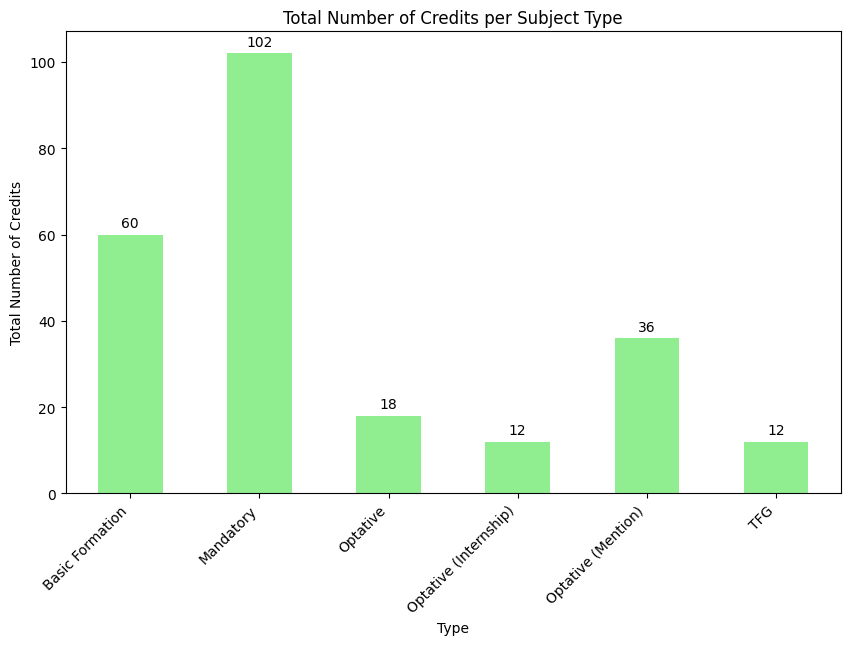

In [20]:
credit_total_type(df)

In [21]:
def credit_type(df):
    type_credits = df.groupby('Type')['Credits'].sum()

    total_credits = type_credits.sum()
    type_percentage = (type_credits / total_credits) * 100

    plt.figure(figsize=(8, 8))
    pie_chart = type_percentage.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3', labels=['']*len(type_percentage))

    plt.legend(pie_chart.patches, type_percentage.index, title="Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.title('Credit Distribution in % by Type')
    plt.ylabel('') 
    plt.show()

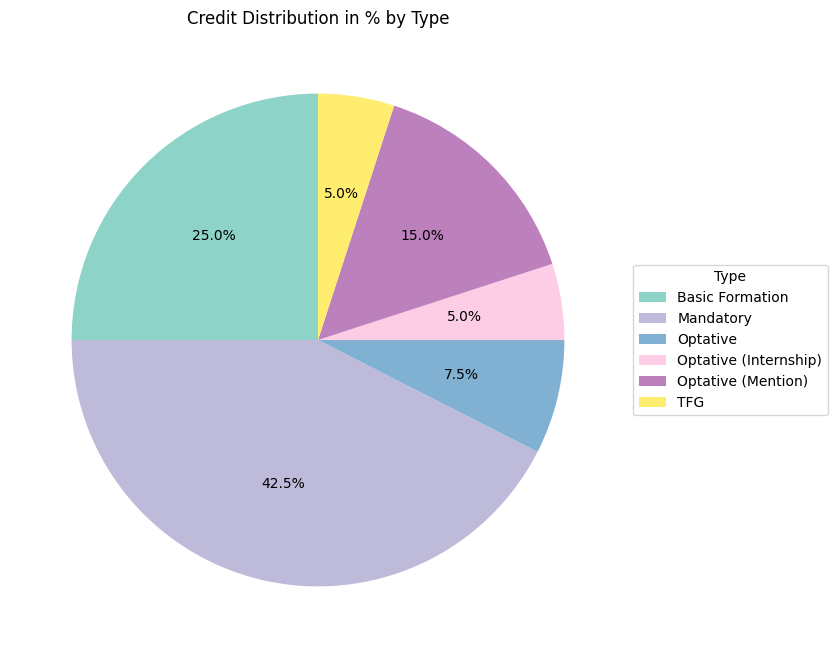

In [22]:
credit_type(df)

In [23]:

def credit_passed_type(df):
    df_approved = df[df['Mark'] != '-']

    approved_credits_by_type = df_approved.groupby('Type')['Credits'].sum()
    total_credits_by_type = df.groupby('Type')['Credits'].sum()
    percentage_approved_credits = (approved_credits_by_type / total_credits_by_type) * 100

    plt.figure(figsize=(10, 6))
    percentage_approved_credits.plot(kind='bar', color='skyblue')

    plt.title('% Distribution of Approved Credits by Type')
    plt.xlabel('Type')
    plt.ylabel('Approval % of Credits')

    plt.xticks(rotation=45, ha='right', rotation_mode='default')

    for i, v in enumerate(percentage_approved_credits):
        plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

    plt.show()    

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


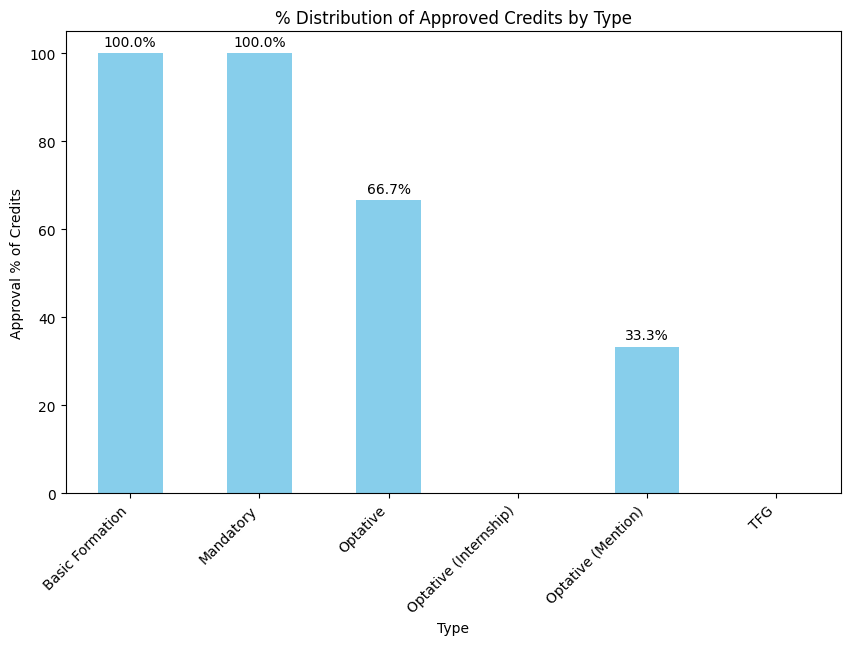

In [24]:
credit_passed_type(df)